<a href="https://colab.research.google.com/github/anushka711/Bank_Customer_Churn/blob/main/BankCustomer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive'

In [9]:
!kaggle datasets download -d barelydedicated/bank-customer-churn-modeling

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 37.5MB/s]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
df=pd.read_csv('/content/bank-customer-churn-modeling.zip')

In [12]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.drop('CustomerId',axis='columns',inplace=True)

In [17]:
columns_to_normalize=['EstimatedSalary','Balance','CreditScore']
scaler=MinMaxScaler();
df[columns_to_normalize]=scaler.fit_transform(df[columns_to_normalize])

In [19]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [20]:
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,0.538,France,0,42,2,0.000000,1,1,1,0.506735,1
1,2,Hill,0.516,Spain,0,41,1,0.334031,1,0,1,0.562709,0
2,3,Onio,0.304,France,0,42,8,0.636357,3,1,0,0.569654,1
3,4,Boni,0.698,France,0,39,1,0.000000,2,0,0,0.469120,0
4,5,Mitchell,1.000,Spain,0,43,2,0.500246,1,1,1,0.395400,0


In [25]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
 pd.isnull(df).sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
df = pd.get_dummies(data=df, columns=['Geography'])
df.head()

,RowNumber,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,Hargrave,0.538,0,42,2,0.000000,1,1,1,0.506735,1,1,0,0
1,2,Hill,0.516,0,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,3,Onio,0.304,0,42,8,0.636357,3,1,0,0.569654,1,1,0,0
3,4,Boni,0.698,0,39,1,0.000000,2,0,0,0.469120,0,1,0,0
4,5,Mitchell,1.000,0,43,2,0.500246,1,1,1,0.395400,0,0,0,1


In [28]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [29]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [30]:
columns_to_normalize=['Age','Tenure']
scaler=MinMaxScaler();
df[columns_to_normalize]=scaler.fit_transform(df[columns_to_normalize])

In [31]:
df.tail()

,RowNumber,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9995,9996,Obijiaku,0.842,1,0.283784,0.5,0.000000,2,1,0,0.481341,0,1,0,0
9996,9997,Johnstone,0.332,1,0.229730,1.0,0.228657,1,1,1,0.508490,0,1,0,0
9997,9998,Liu,0.718,0,0.243243,0.7,0.000000,1,0,1,0.210390,1,1,0,0
9998,9999,Sabbatini,0.844,1,0.324324,0.3,0.299226,2,1,0,0.464429,1,0,1,0
9999,10000,Walker,0.884,0,0.135135,0.4,0.518708,1,1,0,0.190914,0,1,0,0


In [32]:
df.drop('RowNumber',axis='columns',inplace=True)

In [33]:
df.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,Hill,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,Onio,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,Boni,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,Mitchell,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1


In [34]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [35]:
df.drop('Surname',axis='columns',inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


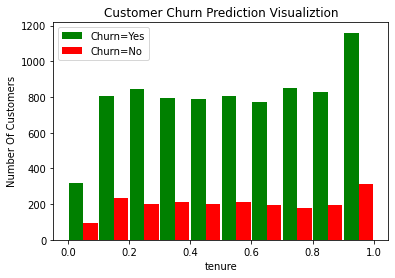

In [40]:
tenure_churn_no = df[df.Exited==1].Tenure
tenure_churn_yes = df[df.Exited==0].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


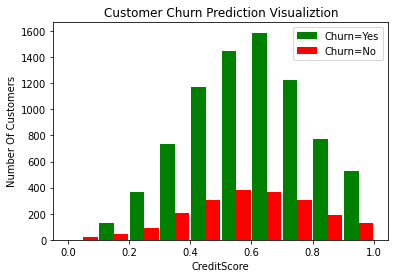

In [41]:
CreditScore_churn_no = df[df.Exited==1].CreditScore
CreditScore_churn_yes = df[df.Exited==0].CreditScore

plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([CreditScore_churn_yes, CreditScore_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [42]:
df.shape

(10000, 13)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(5), int64(5), uint8(3)
memory usage: 810.7 KB


In [45]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
X_train.shape

(8000, 12)

In [50]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)



Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4889 - accuracy: 0.7958
Epoch 2/100
250/250 [==============================] - 0s 988us/step - loss: 0.4323 - accuracy: 0.8096
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8251
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8284
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8441
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.8464
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8419
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8569
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8427
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3512 - accu

In [51]:
yp = model.predict(X_test)
yp[:5]

array([[0.17495948],
       [0.2683071 ],
       [0.10818994],
       [0.0403395 ],
       [0.09059206]], dtype=float32)

In [52]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [53]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [54]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Text(69.0, 0.5, 'Truth')

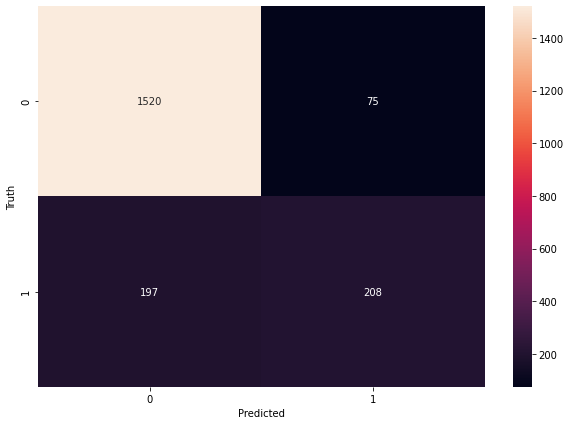

In [55]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Accuracy**

In [57]:
round((1520+208)/(1520+208+75+197),2)

0.86

**Precision for 0 class. i.e. Precision for customers who did not churn**


In [59]:
round(1520/(1520+197),2)

0.89

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [60]:
round(208/(208+75),2)

0.73

**Recall for 0 class**


In [61]:
round(1520/(1520+75),2)

0.95

**Recall for 1 class**

In [62]:
round(208/(208+179),2)

0.54